In [12]:
import numpy as np
Data=np.load('data.npy')
Target=np.load('target.npy')
#loading the save numpy arrays in the previous code

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=Data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [14]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(Data,Target,test_size=0.1)

In [15]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=15,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/15
31/31 [==============================] - 51s 2s/step - loss: 0.6606 - accuracy: 0.6101 - val_loss: 0.5047 - val_accuracy: 0.7944
Epoch 2/15
31/31 [==============================] - 56s 2s/step - loss: 0.4414 - accuracy: 0.7939 - val_loss: 0.3355 - val_accuracy: 0.8911
Epoch 3/15
31/31 [==============================] - 47s 2s/step - loss: 0.2998 - accuracy: 0.8848 - val_loss: 0.2726 - val_accuracy: 0.9073
Epoch 4/15
31/31 [==============================] - 46s 1s/step - loss: 0.2158 - accuracy: 0.9152 - val_loss: 0.2253 - val_accuracy: 0.9355
Epoch 5/15
31/31 [==============================] - 45s 1s/step - loss: 0.2118 - accuracy: 0.9111 - val_loss: 0.3278 - val_accuracy: 0.8548
Epoch 6/15
31/31 [==============================] - 51s 2s/step - loss: 0.1855 - accuracy: 0.9263 - val_loss: 0.1761 - val_accuracy: 0.9395
Epoch 7/15
31/31 [==============================] - 46s 1s/step - loss: 0.1056 - accuracy: 0.9697 - val_loss: 0.2199 - val_accuracy: 0.9315
Epoch 8/15
31/31 [==

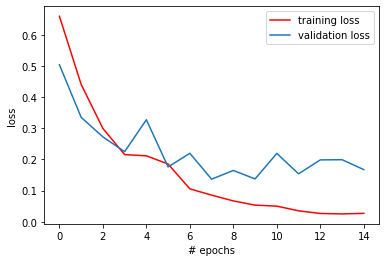

In [19]:

from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

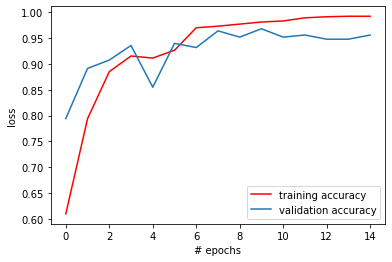

In [20]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [21]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 297ms/step - loss: 0.1716 - accuracy: 0.9565
[0.1715773195028305, 0.95652174949646]
